# What is Machine Learning?
The construction and study of algorithms that learn and make predictions on data.

The algorithms operate by building models with tunable parameters (typically an array of floating point values) that are adjusted automatically so as to improve their behavior by adapting to previously seen data.

#Why Machine Learning?
Some problems are too difficult to solve with physical models

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("0JL04JJjocc")

# Terminology
**Observations**: Raw data used for learning or evaluations 

**Features**: Attributes/transformations used to represent observations (typically numeric) 

**Labels**: Values/categories assigned to observations

**Training and Test Data**: Obervations used to train and test the learning algorithm (test data is withheld at train time)

# Categories of Machine Learning      
##Supervised Learning
Learning models that map inputs (observations or features) to outputs (labels) given desired input and output examples. 

e.g classification and regression

In [7]:
YouTubeVideo("MnZNSZGNGyc")

##Unsupervised Learning
Learning structure of observations without labels 

e.g clustering and dimension reduction
 

In [8]:
YouTubeVideo("juDvLrFQF0U")

## Reinforcement Learning:
Learning by interaction with a dynamic environment with the goal of maximizing a cummulative reward


In [9]:
YouTubeVideo("lleRKHsJBJ0")

#Image classification example with scikit-learn: (Recognizing hand-written digits)

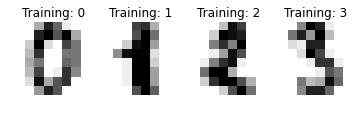

In [9]:
%matplotlib inline

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# The data that we are interested in is made of 8x8 images of digits. 
# Below are the first 3 images, stored in the `images` attribute of the
# dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)


In [10]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# use first half of obervations as training set
train_features = data[:n_samples / 2]
train_labels = digits.target[:n_samples / 2]

# use second half of observations as testing set
truth_features = data[n_samples / 2:]
truth_labels = digits.target[n_samples / 2:]

# support vector machine classifier
clf = svm.SVC(gamma=.001)

# learn digit recognition model with our training samples
clf.fit(train_features, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [11]:
# Now predict the value of the digit on the testing samples
predicted = clf.predict(truth_features)
print "Confusion matrix:\n%s" % metrics.confusion_matrix(truth_labels, predicted)


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


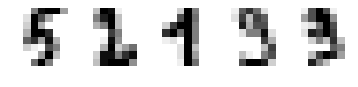

In [12]:
# Exercise: Run this cell, guess what numbers are displayed, and compare your 
# guess with true values and machine learning predictions
import numpy as np
import random
s = random.sample(range(0,predicted.shape[0]),5)
predicted = clf.predict(truth_features[s])
truth_images = digits.images[n_samples / 2:]
exer_imgs = []
[exer_imgs.append(truth_images[s_idx]) for s_idx in s]
index = 1
for img in exer_imgs:
    plt.subplot(1, 5, index)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    index+=1


In [13]:
#########################
my_guess = [0, 0, 0, 0, 0] # you may put your guess for the above images here
#########################
print 'Human guess =',np.array(my_guess)
print 'Predicted   =', predicted
print 'True values =',truth_labels[s]


Human guess = [0 0 0 0 0]
Predicted   = [5 2 1 9 9]
True values = [5 2 1 9 9]
